<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTÃO 4**

# **a) Discussão sobre o problema**

Em ambientes varejistas, a gestão de reclamações é um pilar estratégico fundamental para a manutenção da saúde do negócio e a fidelização de clientes. Clientes insatisfeitos podem não apenas deixar de consumir, mas também propagar experiências negativas, impactando a reputação da empresa e atraindo novos consumidores. Prever a probabilidade de um cliente reclamar nos últimos 2 anos, como proposto neste problema, permite que a empresa adote uma postura proativa, oferecendo suporte personalizado e antecipando possíveis insatisfações antes mesmo que elas se concretizem.

Essa abordagem não só melhora a experiência individual do consumidor, mas também otimiza recursos, pois a equipe de atendimento pode focar nos clientes de maior risco. A personalização do serviço, impulsionada por essas previsões,

# **b) Análise Descritiva dos Dados**

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-personality-analysis


In [4]:
# Ler base

df = pd.read_csv(path + "/marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Verificação de valores nulos

print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
# Como há poucos valores nulos vamos removê-los

df = df.dropna()
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
df.shape

(2216, 29)

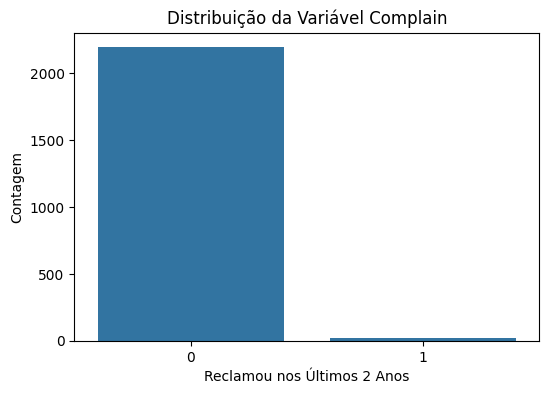

In [10]:
# Análise da variável alvo 'Complain'

df['Complain'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='Complain', data=df)
plt.title('Distribuição da Variável Complain')
plt.xlabel('Reclamou nos Últimos 2 Anos')
plt.ylabel('Contagem')
plt.show()

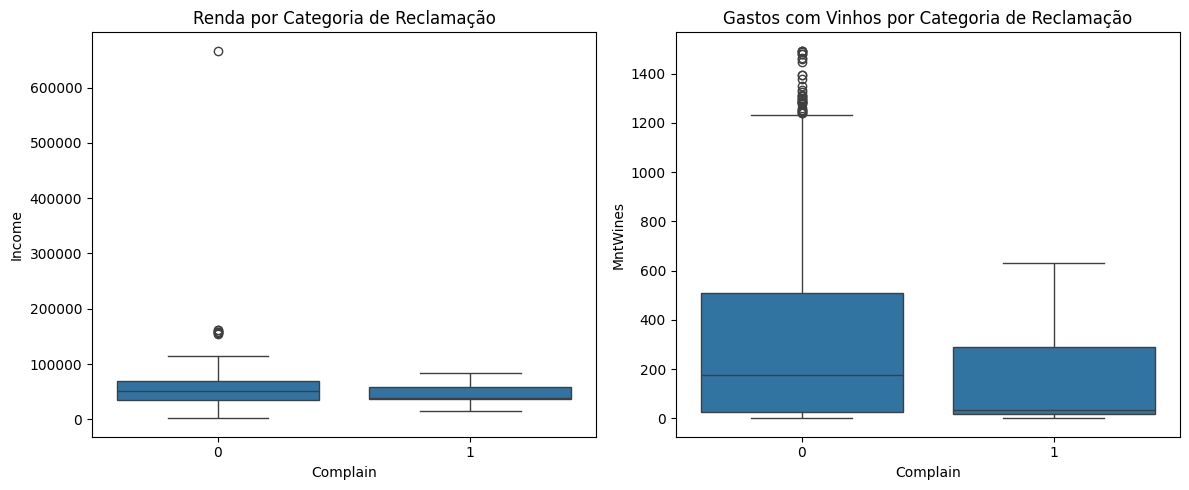

In [11]:
# Distribuição de algumas variáveis numéricas em relação a 'Complain'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Complain', y='Income', data=df)
plt.title('Renda por Categoria de Reclamação')
plt.subplot(1, 2, 2)
sns.boxplot(x='Complain', y='MntWines', data=df)
plt.title('Gastos com Vinhos por Categoria de Reclamação')
plt.tight_layout()
plt.show()

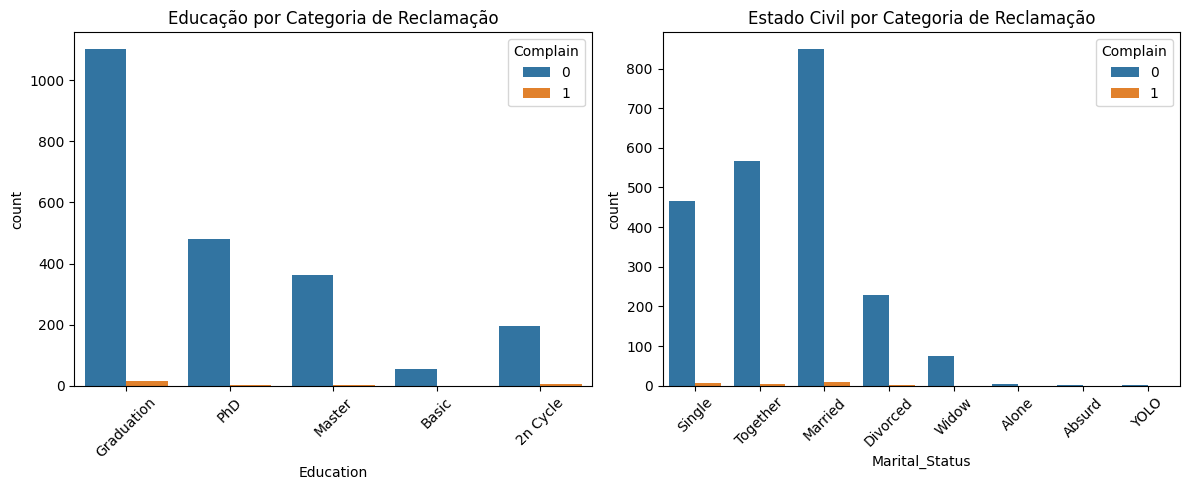

In [12]:
# Análise de variáveis categóricas em relação a 'Complain'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Education', hue='Complain', data=df)
plt.title('Educação por Categoria de Reclamação')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(x='Marital_Status', hue='Complain', data=df)
plt.title('Estado Civil por Categoria de Reclamação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Excluir 'ID' e 'Dt_Customer'
df = df.drop(columns=['ID', 'Dt_Customer'], errors='ignore')

In [14]:
# Codificação de variáveis categóricas (One-Hot Encoding)

categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False


# **c) Definição e Seleção dos Modelos**

In [15]:
df_model = df_encoded

In [16]:
# Separar features (X) e variável alvo (y)
X = df_model.drop('Complain', axis=1)
y = df_model['Complain']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




Distribuição da variável 'Complain' DEPOIS do balanceamento (no conjunto de treino):
Complain
0    1755
1    1755
Name: count, dtype: int64
Complain
0    0.5
1    0.5
Name: proportion, dtype: float64


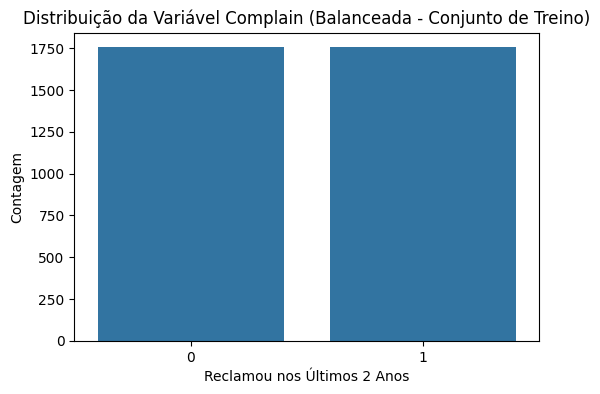

In [17]:
# Observamos o desbalanceamento de classes muito grande. Se optarmos por remover
# valores '0', até igualar aos de valor '1', ficaríamos com uma base muito pequena
# Assim, será aplicado o SMOTE, para criar dados sintéticos

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) # Usando X_train_scaled_df do exemplo anterior

print("\nDistribuição da variável 'Complain' DEPOIS do balanceamento (no conjunto de treino):")
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# Você pode opcionalmente visualizar a distribuição balanceada (no conjunto de treino)
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribuição da Variável Complain (Balanceada - Conjunto de Treino)')
plt.xlabel('Reclamou nos Últimos 2 Anos')
plt.ylabel('Contagem')
plt.show()

In [18]:
# Escalonamento das features numéricas (importante para Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para manter nomes das colunas (útil para SHAP)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# **Modelos e Validação**

In [19]:
models = {
    'Regressão Logística': LogisticRegression(random_state=42, solver='liblinear'),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}


In [20]:
for name, model in models.items():
    print(f"\nTreinando e avaliando: {name}")
    # Para Regressão Logística, usamos dados escalados
    if name == 'Regressão Logística':
        model.fit(X_train, X_test_scaled_df)
        y_pred = model.predict(X_test_scaled_df)
        y_proba = model.predict_proba(X_test_scaled_df)[:, 1]
    else:
        model.fit(X_train, y_train) # Outros modelos não requerem escalonamento obrigatório
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'Matriz de Confusão': cm
    }

    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  Matriz de Confusão:\n{cm}")


Treinando e avaliando: Regressão Logística


ValueError: y should be a 1d array, got an array of shape (444, 35) instead.

# **d) Explicabilidade das Variáveis - SHAP value**

In [ ]:
import shap

# Re-treinar o modelo escolhido - Random Forest
model_final = models['Random Forest']
model_final.fit(X_train, y_train)


In [ ]:
# X_explain será o conjunto de teste, garantindo que é um DataFrame
X_explain = X_test[X_train.columns].copy() # Garantindo as mesmas colunas e ordem que X_train

# Criar um 'explainer' SHAP específico para modelos baseados em árvores
explainer = shap.TreeExplainer(model_final)

In [ ]:
# Calcular os SHAP values
# shap_values será uma LISTA de arrays, um para cada classe
shap_values = explainer.shap_values(X_explain)

In [ ]:
# # Criar um 'explainer' SHAP

# X_explain = X_test.copy() # Ensure X_explain is X_test
# explainer = shap.TreeExplainer(model_final)
# shap_values = explainer.shap_values(X_explain)

In [ ]:
# --- Verificação das formas finais para depuração ---
print(f"\nShape of X_explain: {X_explain.shape}")
print(f"Shape of shap_values: {shap_values.shape}") # Isso irá imprimir (444, 35, 2)


In [ ]:
# Agora, o bloco de verificação precisa entender que shap_values é um array 3D
# e que precisamos selecionar a dimensão da classe para comparar as formas 2D
if shap_values.shape[0] == X_explain.shape[0] and shap_values.shape[1] == X_explain.shape[1]:
    print("As dimensões de amostras e features correspondem. Pronta para plotar a classe específica.")
else:
    raise AssertionError(f"Formas ainda não correspondem! shap_values.shape={shap_values.shape}, X_explain.shape={X_explain.shape}")


In [ ]:
# Resumo das importâncias das features (Global Feature Importance)
# ACESSE SEMPRE A CLASSE DE INTERESSE (índice 1 para "reclamou")
shap.summary_plot(shap_values[:, :, 1], X_explain, plot_type="bar", show=False)
plt.title('Importância Global das Features (SHAP values para a classe "Reclamou")')
plt.tight_layout()
plt.show()


In [ ]:
# Gráfico de resumo SHAP (Feature Importance e Direção)
# ACESSE SEMPRE A CLASSE DE INTERESSE (índice 1 para "reclamou")
shap.summary_plot(shap_values[:, :, 1], X_explain, show=False)
plt.title('SHAP Summary Plot para a Classe "Reclamou"')
plt.tight_layout()
plt.show()


# **Interpretação dos Resultados SHAP:**

# **e) Análise Não Supervisionada com K-Means e DBSCAN**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Para K-Means e DBSCAN, é importante usar dados escalados e selecionar features relevantes.
# Vamos usar as features numéricas e as categóricas codificadas.
# Excluindo 'Complain' e 'ID', 'Dt_Customer' que não são para agrupamento
clustering_features = df_encoded.drop(columns=['Complain', 'ID', 'Dt_Customer'], errors='ignore')


In [ ]:
# Escalonar as features para o agrupamento
scaler_clustering = StandardScaler()
X_clustered = scaler_clustering.fit_transform(clustering_features)
X_clustered_df = pd.DataFrame(X_clustered, columns=clustering_features.columns)


In [ ]:
# Método do Cotovelo para encontrar o número ótimo de clusters (K)
sse = []
for k in range(1, 11): # Testar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warning
    kmeans.fit(X_clustered_df)
    sse.append(kmeans.inertia_) # inertia_ é a soma dos quadrados das distâncias das amostras ao centro do cluster mais próximo

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE (Soma dos Quadrados dos Erros)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Baseado no gráfico do cotovelo, vamos escolher um K
# Justificativa: O "cotovelo" na curva (ponto onde a diminuição do SSE começa a diminuir significativamente)
# sugere o número ideal de clusters, k=3

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X_clustered_df)

print("\nContagem de clientes por cluster K-Means:")
print(df['KMeans_Cluster'].value_counts())

In [ ]:
# Análise dos perfis dos clusters
print("\nMédias das features por cluster K-Means (desescalado para interpretação):")
# Invertendo o escalonamento para interpretar as médias
cluster_centers_scaled = kmeans_final.cluster_centers_
cluster_centers_original = scaler_clustering.inverse_transform(cluster_centers_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_features.columns)
cluster_centers_df['Cluster'] = range(3)
print(cluster_centers_df)

In [ ]:
# Incluindo a proporção de 'Complain' em cada cluster
cluster_complain_rate = df.groupby('KMeans_Cluster')['Complain'].mean()
print("\nProporção de reclamações por cluster K-Means:")
print(cluster_complain_rate)

In [ ]:
# Visualização de clusters em relação a duas features importantes
# (Você pode escolher as duas features mais impactantes do SHAP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_Birth', y='MntWines', hue='KMeans_Cluster', data=df, palette='viridis', style='Complain', s=100)
plt.title('Clusters K-Means por Renda e Gastos com Vinhos (com Complain)')
plt.xlabel('Renda')
plt.ylabel('Gastos com Vinhos')
plt.legend(title='Cluster / Complain')
plt.grid(True)
plt.show()

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

# Para DBSCAN, os parâmetros eps (distância máxima entre duas amostras para uma ser considerada do bairro da outra)
# e min_samples (número de amostras em um bairro para que um ponto seja considerado um ponto central) são cruciais.
# A escolha desses parâmetros geralmente requer experimentação.
# Para simplificar, vou usar valores arbitrários para demonstração.
# Em um cenário real, você ajustaria esses valores.

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_clustered_df)

print("\nContagem de clientes por cluster DBSCAN (observação: -1 indica outliers):")
print(df['DBSCAN_Cluster'].value_counts())

In [ ]:
# Análise dos outliers detectados pelo DBSCAN
outliers_dbscan = df[df['DBSCAN_Cluster'] == -1]
print(f"\nNúmero de outliers detectados pelo DBSCAN: {len(outliers_dbscan)}")
print("\nCaracterísticas dos outliers DBSCAN (primeiras 5 linhas):")
print(outliers_dbscan.head())

In [ ]:
# Proporção de reclamações entre outliers vs. não-outliers
print("\nProporção de reclamações em Outliers (DBSCAN - Cluster -1):")
print(outliers_dbscan['Complain'].value_counts(normalize=True))

non_outliers_dbscan = df[df['DBSCAN_Cluster'] != -1]
print("\nProporção de reclamações em Não-Outliers (DBSCAN):")
print(non_outliers_dbscan['Complain'].value_counts(normalize=True))

# **Comparação e Complementaridade (K-Means vs. DBSCAN):**